<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Warning" data-toc-modified-id="Warning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Packages-import" data-toc-modified-id="Packages-import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages import</a></span></li><li><span><a href="#Datasets-selection" data-toc-modified-id="Datasets-selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Datasets selection</a></span></li><li><span><a href="#Quantification" data-toc-modified-id="Quantification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantification</a></span><ul class="toc-item"><li><span><a href="#Prepare-fitting-tool" data-toc-modified-id="Prepare-fitting-tool-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prepare fitting tool</a></span></li><li><span><a href="#Run-fit" data-toc-modified-id="Run-fit-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Run fit</a></span></li></ul></li></ul></div>

# Warning
Compared with the reconstruction, the fitting feature in PASTIS remains quite an adventure and some parts of the code can seem a bit obscure to the user. Sorry ;)

# Packages import

In [1]:
# packages import
import pastis.fit as fit
import pastis.log as log
import pandas as pd

# that is not porn sorry! It is a file generated automatically by PASTIS containing useful aliases
import pastis.aliases as xxx  

# setting logger level
# from most verbose to very quiet: DEBUG, INFO, WARN, ERROR
log.setLevel(log.ERROR)

# setting up matplotlib
import matplotlib.pylab as plt
%matplotlib notebook


# Datasets selection
Choose what datasets to fit

In [2]:
# read pkl file containing all the reconstructed signals (see demo_data_processing notebook)
df = pd.read_pickle("db_reconstructed_data.pkl")
df

,reco_dataset_legend,reco_dataset_physio_file,reco_dataset_imaging_file,reco_dataset_resp_bpm,reco_dataset_heart_bpm,reco_dataset_comment,reco_dataset_raw_files,reco_dataset_raw_data,reco_dataset_raw_analysis_results_phasing_snr,reco_dataset_raw_analysis_results_phasing_lw,...,reco_job_ref_data_analyzing_snr_magnitude_mode,reco_job_ref_data_analyzing_snr_display,reco_job_ref_data_analyzing_snr_display_range_ppm,reco_job_ref_data_analyzing_lw_job_func,reco_job_ref_data_analyzing_lw_job_name,reco_job_ref_data_analyzing_lw_POI_ref_range_ppm,reco_job_ref_data_analyzing_lw_magnitude_mode,reco_job_ref_data_analyzing_lw_display,reco_job_ref_data_analyzing_lw_display_range_ppm,timestamp
dataset_raw_data_file_hash,,,,,,,,,,,,,,,,,,,,,
c439eeb7b3f56748dee80315001aae51,#0 sLASER short TE,None,None,17,75,None,"[./data/spinal_cord_sLASER_longTE_WS.dat, ./da...","[(743.6148599367879+4.306274170843586j), (697....",9.302507,14.648437,...,False,False,"[1, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[1, 6]",2021-09-07 11:09:07.550411
e5fae3ec79f28faace3079346a784067,#1 sLASER long TE,None,None,17,65,None,"[./data/spinal_cord_sLASER_shortTE_WS.dat, ./d...","[(1012.7801670147272+99.95514404377174j), (830...",5.389545,15.869141,...,False,False,"[1, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[1, 6]",2021-09-07 11:09:07.550411


In [3]:
# for example, I want to fit all raw datasets acquired with a TE below 30ms
df = df.loc[df["reco_dataset_raw_data_sequence_te"] > 30]

# convert series to dataframe, if needed
if(type(df) is pd.core.series.Series):
    df = df.to_frame().T

df

,reco_dataset_legend,reco_dataset_physio_file,reco_dataset_imaging_file,reco_dataset_resp_bpm,reco_dataset_heart_bpm,reco_dataset_comment,reco_dataset_raw_files,reco_dataset_raw_data,reco_dataset_raw_analysis_results_phasing_snr,reco_dataset_raw_analysis_results_phasing_lw,...,reco_job_ref_data_analyzing_snr_magnitude_mode,reco_job_ref_data_analyzing_snr_display,reco_job_ref_data_analyzing_snr_display_range_ppm,reco_job_ref_data_analyzing_lw_job_func,reco_job_ref_data_analyzing_lw_job_name,reco_job_ref_data_analyzing_lw_POI_ref_range_ppm,reco_job_ref_data_analyzing_lw_magnitude_mode,reco_job_ref_data_analyzing_lw_display,reco_job_ref_data_analyzing_lw_display_range_ppm,timestamp
dataset_raw_data_file_hash,,,,,,,,,,,,,,,,,,,,,
c439eeb7b3f56748dee80315001aae51,#0 sLASER short TE,None,None,17,75,None,"[./data/spinal_cord_sLASER_longTE_WS.dat, ./da...","[(743.6148599367879+4.306274170843586j), (697....",9.302507,14.648437,...,False,False,"[1, 6]",<function MRSData2.analyze_linewidth_1d at 0x7...,analyzing ref. data peak-linewidth,"[4.5, 5.2]",False,False,"[1, 6]",2021-09-07 11:09:07.550411


# Quantification

## Prepare fitting tool

In [10]:
# create fit object
fit_tool = fit.fit_pastis()

# before the fit, some peak area integration is performed: choose what peak to integrate 
fit_tool.metabolites_area_integration = [xxx.m_NAA_CH3, xxx.m_Cr_CH3, xxx.m_Cho_CH3]
# and their respective integration width (ppm)
fit_tool.area_integration_peak_ranges = [0.1, 0.1, 0.1]

# choose which metabolites to include in the fit basis set
fit_tool.metabolites = [xxx.m_Water,
                        xxx.m_LipA,
                        xxx.m_LipB,
                        xxx.m_LipC,
                        xxx.m_NAA,
                        xxx.m_NAAG,
                        xxx.m_Cr_CH3,
                        xxx.m_Cr_CH2,
                        xxx.m_PCr,
                        xxx.m_GPC,
                        xxx.m_PC,
                        xxx.m_mI,
                        xxx.m_Glu,
                        xxx.m_Gln,
                        xxx.m_Tau]

# --- preparing minimum, maximum and initial fitting parameter sets ---
    
# create default minimum and maximum parameter sets
fit_tool.params_min = fit_tool.params_min.set_default_min().add_macromolecules_min()
fit_tool.params_max = fit_tool.params_max.set_default_max().add_macromolecules_max()

# initial parameter values for fit
fit_tool.params_init = (fit_tool.params_min + fit_tool.params_max) / 2.0

# --- concentrations
    
# fit ranges for concentration for all metabolites and macromolecules
fit_tool.params_min[:, xxx.p_cm] = 0.0
fit_tool.params_max[:, xxx.p_cm] = 200.0
# increase maximum concentration for all macromolecules
fit_tool.params_max[xxx.m_All_MMs, xxx.p_cm] = 1000.0

# set initial concentrations to zero
fit_tool.params_init[:, xxx.p_cm] = 0.0
# start fit with 0.1 concentrations for metabolites in basis set
fit_tool.params_init[fit_tool.metabolites, xxx.p_cm] = 0.1
    
# --- linewidths
    
# minimal damping for all metabolites and macromolecules
fit_tool.params_min[:, xxx.p_dd] = 5

# increase damping ranges for all macromolecules (these are usually broad peaks)
fit_tool.params_min[xxx.m_All_MMs, xxx.p_dd] = 150
fit_tool.params_max[xxx.m_All_MMs, xxx.p_dd] = 300
    
# start fit with minimal linewidth (= narrow peaks)
fit_tool.params_init[:, xxx.p_dd] = fit_tool.params_min[:, xxx.p_dd] * 1.1

# --- frequency shifts

# frequency shift ranges for all metabolites and MMs
fit_tool.params_min[:, xxx.p_df] = -10.0
fit_tool.params_max[:, xxx.p_df] = 10.0
# start fit with no frequency shifts
fit_tool.params_init[:, xxx.p_df] = 0.0

# -- phase shifts
    
# phase shift ranges for all metabolites and MMs
fit_tool.params_min[:, xxx.p_dp] = -0.1
fit_tool.params_max[:, xxx.p_dp] = +0.1
# start fit with no phase shifts
fit_tool.params_init[:, xxx.p_dp] = 0.0

# --- set relations between parameters ---

# first, let's lock all the metabolites
fit_tool.params_linklock[:] = xxx.ll_FIXED

# except the metabolites included in the fit basis set
fit_tool.params_linklock[fit_tool.metabolites, :] = xxx.ll_FREE

# we want a global phase for all metabolites and macromolecules
# in practice we will specify that all phase shifts are obeying the phase of Creatine
fit_tool.params_linklock[fit_tool.metabolites, xxx.p_dp] = xxx.ll_SLAVE1
fit_tool.params_linklock[xxx.m_Cr_CH3, xxx.p_dp] = xxx.ll_MASTER1

# --- an exception for water ---

# all water fitting parameters are free
fit_tool.params_linklock[xxx.m_Water, :] = xxx.ll_FREE

# water max concentration is increased
fit_tool.params_max[xxx.m_Water, xxx.p_cm] = 1000

## Run fit
This following code calls the fit tool prepared above on a set of datasets.

<IPython.core.display.Javascript object>


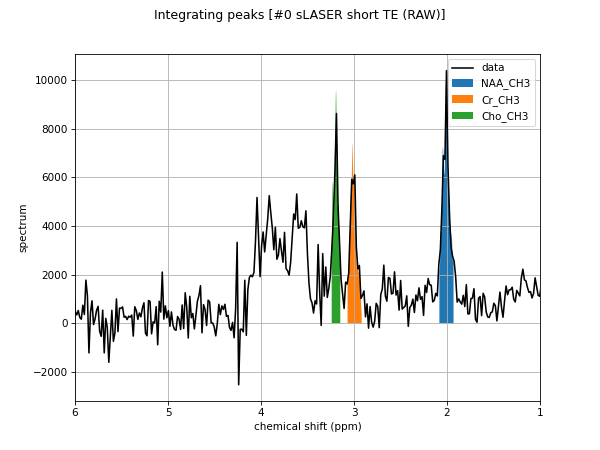

<IPython.core.display.Javascript object>


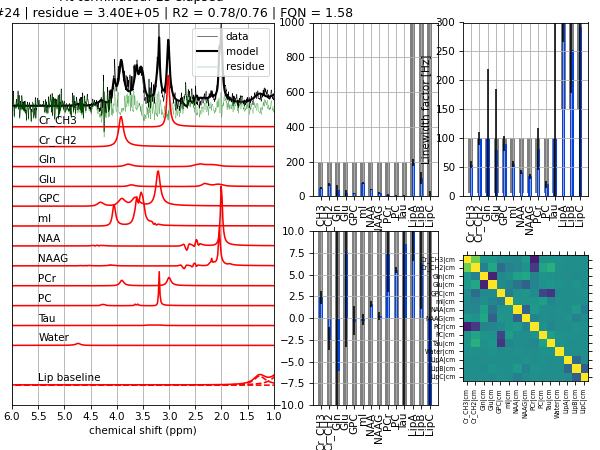

[#] Metabolite [cm]       [dd]       [df]       [dp]       
# 0 Ala        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 1 Asc        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 2 Asp        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 3 Cho        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 4 Cho_CH3    ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 5 Cr_CH3     (45.9)⁰    (54.8)⁰    ( 2.4)⁰    ( 0.1)⁻²   
# 6 Cr_CH2     (70.6)⁰    (99.5)⁰    (-2.4)⁰    ( 0.1)⁺²   
# 7 EA         ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 8 Eth        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
# 9 GABA       ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
#10 Glc        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
#11 Gln        (35.4)⁰    (100.0)⁰   (-6.0)⁰    ( 0.1)⁺²   
#12 Glu        (17.9)⁰    (79.8)⁰    ( 7.6)⁰    ( 0.1)⁺²   
#13 Gly        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0.0)⁺¹   ( 0.0)⁺¹   
#14 GPC        (16.5)⁰    (91.1)⁰    (-0.3)⁰    ( 0.1)⁺²   
#15 Gsh        ( 0.0)⁺¹   ( 5.5)⁺¹   ( 0

/home/tangir/data/work/recherche/crmbm/python/pastis/mrs/sim.py:725: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[p + "|" + m + "|val"] = self[im, ip]
/home/tangir/data/work/recherche/crmbm/python/pastis/mrs/sim.py:726: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[p + "|" + m + "|err"] = self._errors[im, ip]
/home/tangir/data/work/recherche/crmbm/python/pastis/mrs/fit.py:1391: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use 

In [12]:
# list to save fit results
fit_results_list = []

# browse though datasets
for this_index, this_row in df.iterrows():

    # pick reconstructed raw data
    this_data = this_row["reco_dataset_raw_data_obj"]
    
    # remove water residue from data
    this_data = this_data.correct_peak_removal_1d(50, [4.3, 6], False)
    
    # initialize fit tool
    this_fit = fit_tool.copy()
    
    # feed data to the fit tool
    this_fit.data = this_data
        
    # run the fit
    this_fit.run()

    # get the fit results
    this_fit_df = this_fit.to_dataframe()
    
    # store the results
    fit_results_list.append(this_fit_df)

# append all the results and store
df_fit_results = pd.concat(fit_results_list, axis=0)
df_fit_results.to_pickle("db_fit_results.pkl")
